# Data import

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv("tyres_model.csv") #import the original data
df

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure
0,17.990,26,1,0.16,0.01,-8.12,0,1,332.5,8,0,1,5.13,55.0,1,0
1,20.704,36,1,0.30,0.01,-4.52,2,0,328.0,11,1,0,6.15,NaN,1,0
2,19.156,34,1,0.30,0.01,-1.08,0,0,247.0,0,1,0,6.36,NaN,1,0
3,16.802,35,1,0.19,0.02,7.44,1,0,408.0,7,3,1,6.62,54.5,1,0
4,17.140,23,2,0.39,0.01,30.52,0,1,308.0,2,2,0,6.15,76.3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,17.818,29,2,0.39,0.01,7.28,1,1,287.5,10,1,1,5.68,NaN,1,1
2996,17.076,30,1,0.22,0.00,-1.44,1,1,152.5,6,1,0,5.81,NaN,1,1
2997,16.170,33,1,0.39,0.01,-3.44,1,0,235.0,8,3,1,5.57,NaN,0,0
2998,18.872,37,0,0.03,0.00,-0.76,4,0,290.0,11,0,0,5.89,60.3,0,0


## Missing values

In [3]:
df.isnull().sum() #check for missing values --> 2110 missing diameters out of 2999 value --> first approach = remove diameter

vulc                  0
perc_nat_rubber       0
wiring_strength       0
weather               0
perc_imp              0
temperature           0
tread_type            0
tyre_season           0
elevation             0
month                 0
tread_depth           0
tyre_quality          0
perc_exp_comp         0
diameter           2110
add_layers            0
failure               0
dtype: int64

In [2]:
#in the numerical analysis I have identified a series of outliers for vulc and temp
#Removing outliers from vulc 

meanv =df['vulc'].mean()
sdv =df['vulc'].std()

# keep only the ones that are within +x to -x standard deviations in the column vulc
x = 3
ndf=df[np.abs(df['vulc'] - meanv) <= 3 * sdv ]


In [5]:
#Removing outliers from temperature -->I obtained less good results without them so I left them

#meant =df['temperature'].mean()
#sdt =df['temperature'].std()
#x = 3
#ndf=ndf[np.abs(ndf['temperature'] - meant) <= 3 * sdt ]

In [3]:
df_numerical=ndf[["vulc","perc_nat_rubber","weather","perc_imp","temperature","elevation","perc_exp_comp","failure"]]
df_categorical=ndf[["tread_type","tyre_season","month","tread_depth","wiring_strength","tyre_quality","add_layers"]]

#seperate the data into numerical and categorical according to the information provided
#diameter has been eliminated


## Categorical analysis

C:\Users\prisc\AppData\Local\Temp\ipykernel_44088\2722821427.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_0=df_categorical[df['failure']==0] # records wih target==0
C:\Users\prisc\AppData\Local\Temp\ipykernel_44088\2722821427.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_1=df_categorical[df['failure']==1] # records wih target==1


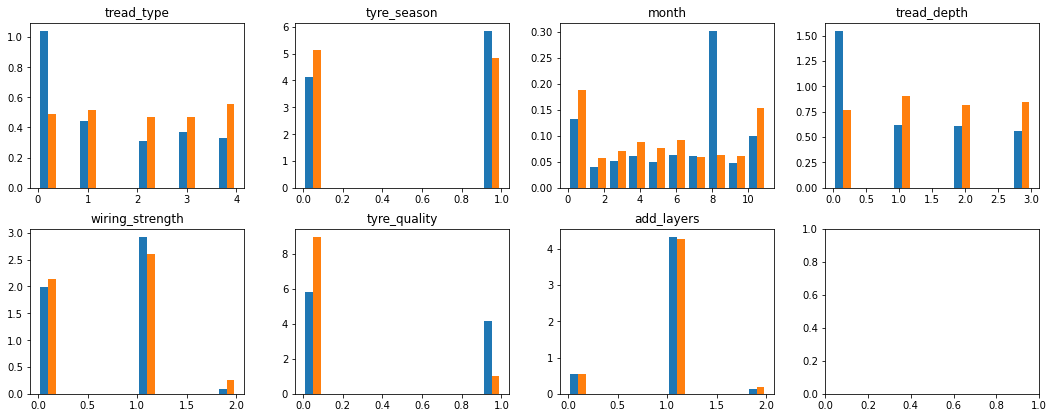

In [7]:
df_0=df_categorical[df['failure']==0] # records wih target==0
df_1=df_categorical[df['failure']==1] # records wih target==1


fig, axes = plt.subplots(2, 4,figsize=[15,6])
axes = axes.flatten()
fig.tight_layout(pad=2)

i=0
for x in df_categorical.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([df_0[x],df_1[x]],density=True)
    plt.title(x)
    i+=1
plt.show()

#first analysis is that add_layers does not seem to have an impact on the failure, for this reason we remove it 


In [4]:
#creating dummy variables for the categorical
selection_categorical=["month"] #I experimented and only kept "month" for the best results (cf. report)

dummies = pd.get_dummies(df_categorical[selection_categorical].astype(str)) 

#I added .astype(str) because the categorical variables where written as numerical

dummies=dummies.reset_index(drop = True) #I had de reset the indexes because I have removed some lines with vulc outliers
dummies.tail()

,month_0,month_1,month_10,month_11,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
2952,0,0,1,0,0,0,0,0,0,0,0,0
2953,0,0,0,0,0,0,0,0,1,0,0,0
2954,0,0,0,0,0,0,0,0,0,0,1,0
2955,0,0,0,1,0,0,0,0,0,0,0,0
2956,0,0,0,0,1,0,0,0,0,0,0,0


## Numerical analysis

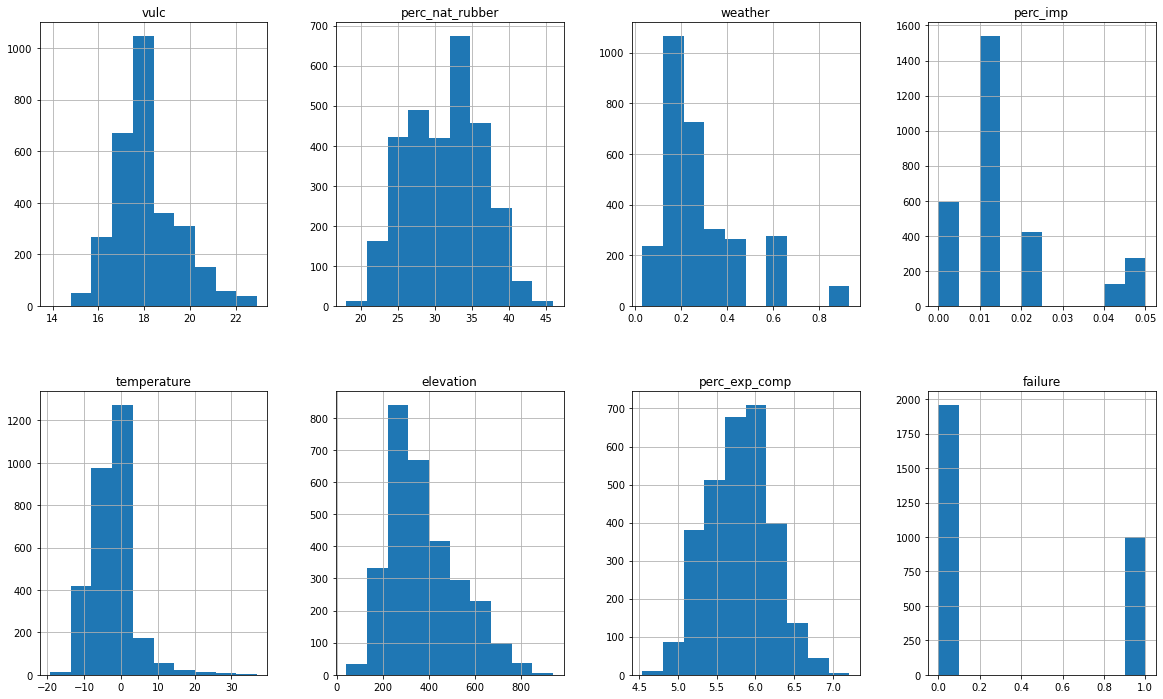

In [9]:
df_hist=df_numerical.hist(layout=(2,4), figsize=(20,12))

#no log decay at first glance
#the targets are in 1/3 2/3 proportions

In [10]:
#here I experimented using a log functions for temperature and vulc to see if it improved the results and it was not conclusive

#log_vulc=np.log10(df["vulc"])
#log_vulc.hist()
#df_numerical['log_vulc']=log_vulc
#np.log10(df["temperature"]).hist()


#temp=df["temperature"]-(min(df["temperature"])-1)
#log_temp=np.log10(temp)
#df_numerical['log_temp']=log_temp
#log_temp.hist()

df_numerical.describe()

,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp,failure
count,2957.000000,2957.000000,2957.000000,2957.000000,2957.000000,2957.000000,2957.000000,2957.000000
mean,18.095426,31.212377,0.282496,0.014444,-2.379317,375.910213,5.788695,0.337166
std,1.385486,4.940739,0.183820,0.014223,5.656164,150.906701,0.410538,0.472822
min,13.888000,18.000000,0.030000,0.000000,-19.280000,41.500000,4.540000,0.000000
25%,17.232000,27.000000,0.160000,0.010000,-7.000000,263.500000,5.480000,0.000000
50%,17.822000,31.000000,0.210000,0.010000,-2.040000,342.000000,5.800000,0.000000
75%,18.830000,35.000000,0.370000,0.020000,0.080000,471.000000,6.080000,1.000000
max,22.942000,46.000000,0.930000,0.050000,37.000000,939.500000,7.210000,1.000000


# EDA


C:\Users\prisc\AppData\Local\Temp\ipykernel_44088\1244552582.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X0=df_numerical[df['failure']==0] # records wih target==0
C:\Users\prisc\AppData\Local\Temp\ipykernel_44088\1244552582.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X1=df_numerical[df['failure']==1] # records wih target==1


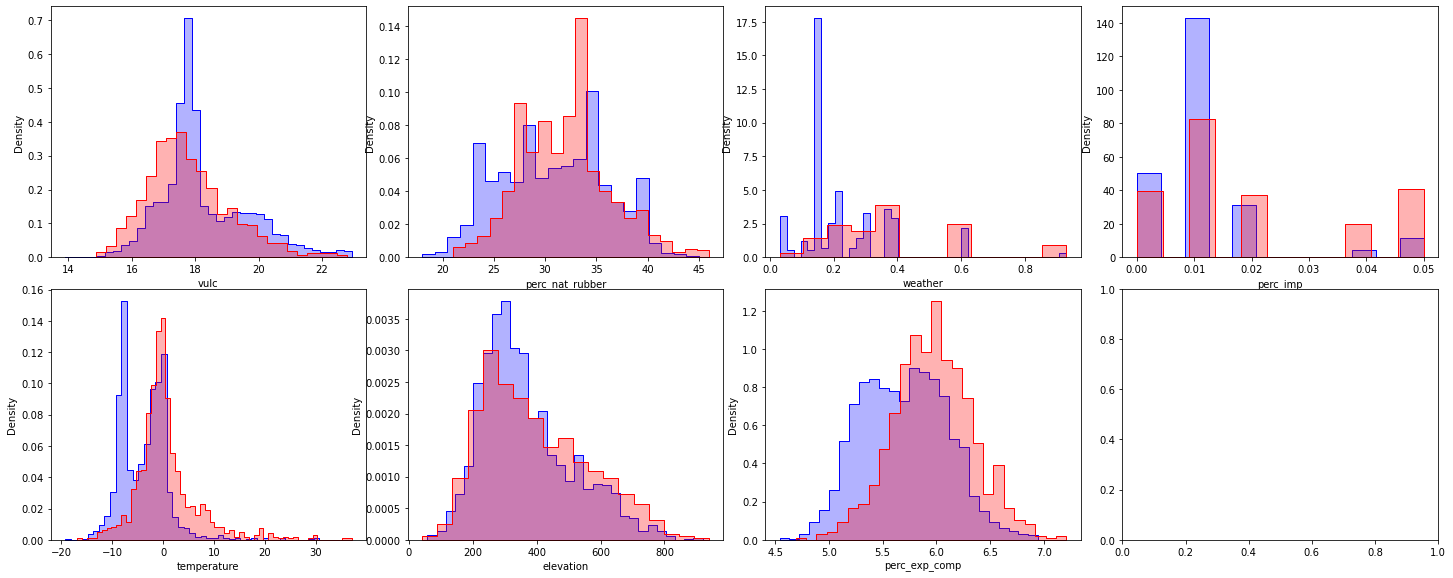

In [11]:
X0=df_numerical[df['failure']==0] # records wih target==0
X1=df_numerical[df['failure']==1] # records wih target==1

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(20,8))
fig.tight_layout()

for i, ax in zip(range(df_numerical.columns.size-1), axes.flat):
    sns.histplot(X0.iloc[:,i], color="blue", ax=ax, stat='density', element="step",  alpha=0.3)
    sns.histplot(X1.iloc[:,i], color="red", ax=ax,stat='density', element="step",  alpha=0.3)
plt.show()

#blue=no failure
#red=failure

#elevation has the same distribution so I'll eliminate if from the subset for the time being


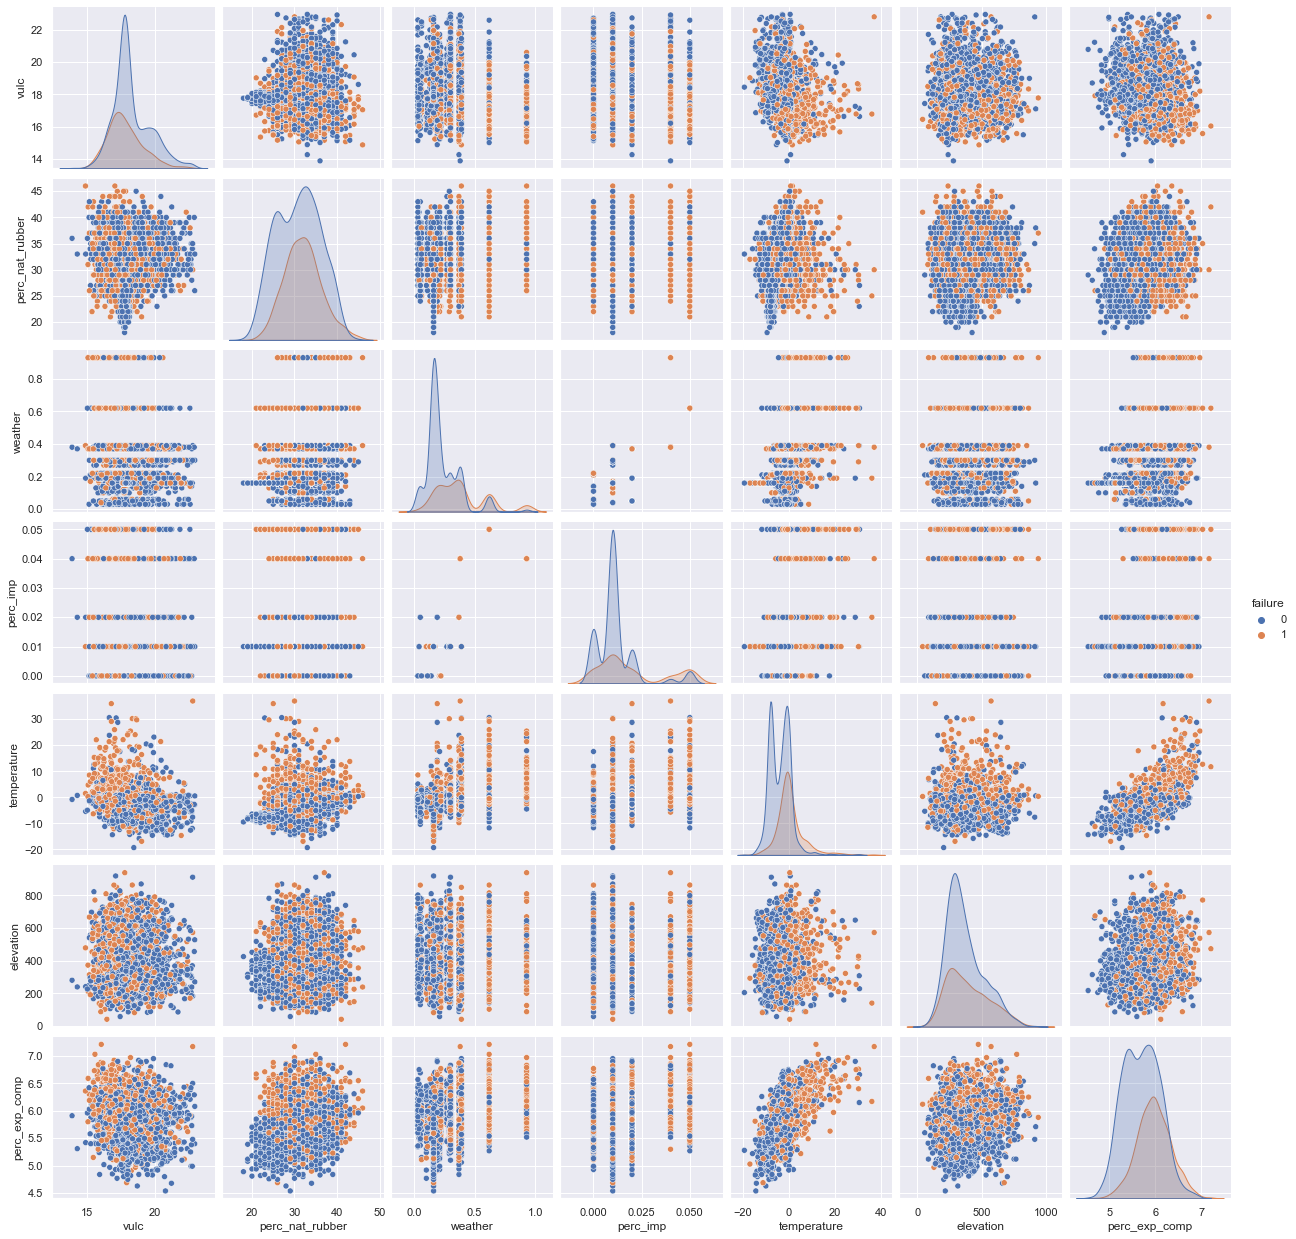

In [138]:
sns.pairplot(df_numerical, hue='failure')
#no stricking dual-combo at first glance

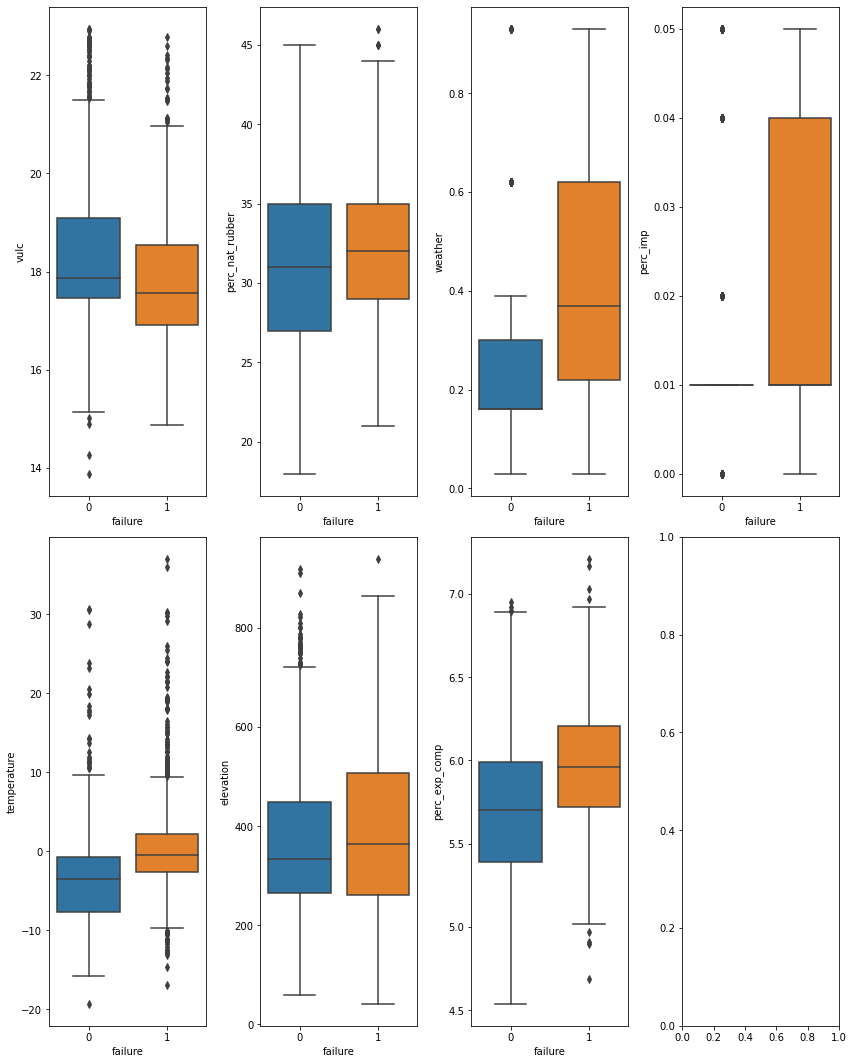

In [14]:
%matplotlib inline
#visual with box plots

fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(12,15))
fig.tight_layout(pad=2)

for i, col in enumerate(df_numerical.columns[:-1]):
    sns.boxplot(y = col, x = "failure",data=df_numerical, orient='v', ax=axes[int(i/4),i%4])
    
#confirming choice to remove "elevation"

In [5]:
df_selec_numerical=df_numerical[["vulc","perc_nat_rubber","weather","perc_imp","temperature","failure"]]
#selecting subset with best results (selected with help of PCA components, tree and logistic regression models)

## Scalling

<AxesSubplot:>

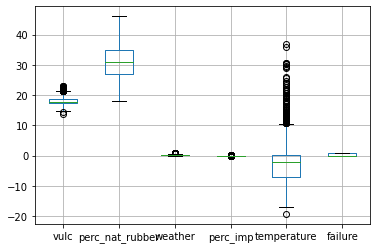

In [6]:
df_selec_numerical.boxplot()

In [7]:
from sklearn.preprocessing import StandardScaler

independent_variables=df_selec_numerical.iloc[:,:-1] #no target

rscaler= StandardScaler().fit(independent_variables) # No target
scaled_df_numerical= pd.DataFrame(rscaler.transform(independent_variables))
scaled_df_numerical.columns = independent_variables.columns


<AxesSubplot:>

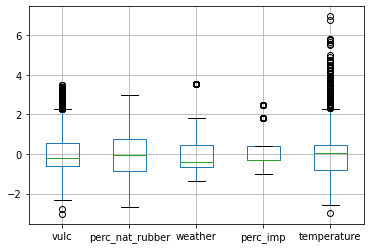

In [18]:
scaled_df_numerical.boxplot()

In [19]:
scaled_df_numerical

,vulc,perc_nat_rubber,weather,perc_imp,temperature
0,-0.076106,-1.055158,-0.666504,-0.312475,-1.015114
1,1.883106,0.969173,0.095241,-0.312475,-0.378533
2,0.765619,0.564307,0.095241,-0.312475,0.229756
3,-0.933712,0.766740,-0.503273,0.390713,1.736332
4,-0.689713,-1.662457,0.584934,-0.312475,5.817526
...,...,...,...,...,...
2952,-0.200271,-0.447858,0.584934,-0.312475,1.708039
2953,-0.735914,-0.245425,-0.340042,-1.015663,0.166098
2954,-1.389947,0.361874,0.584934,-0.312475,-0.187559
2955,0.560602,1.171606,-1.373839,-1.015663,0.286341


In [20]:
scaled_df_numerical.describe()

,vulc,perc_nat_rubber,weather,perc_imp,temperature
count,2.957000e+03,2.957000e+03,2.957000e+03,2.957000e+03,2.957000e+03
mean,1.307412e-15,-4.214492e-17,-5.191804e-16,-3.685475e-16,-6.112422e-17
std,1.000169e+00,1.000169e+00,1.000169e+00,1.000169e+00,1.000169e+00
min,-3.037302e+00,-2.674623e+00,-1.373839e+00,-1.015663e+00,-2.988517e+00
25%,-6.232990e-01,-8.527246e-01,-6.665040e-01,-3.124752e-01,-8.170669e-01
50%,-1.973835e-01,-4.299222e-02,-3.944522e-01,-3.124752e-01,6.000078e-02
75%,5.302823e-01,7.667402e-01,4.761137e-01,3.907129e-01,4.348765e-01
max,3.498697e+00,2.993504e+00,3.523094e+00,2.500277e+00,6.963372e+00


In [8]:
import pickle
pickle.dump(rscaler, open('rscaler.pkl', 'wb'))
#save the scaler for future transformations

In [9]:
X=pd.concat([dummies,scaled_df_numerical], axis = 1) 
X.tail()

#len(X),len(dummies),len(scaled_df_numerical)

,month_0,month_1,month_10,month_11,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,vulc,perc_nat_rubber,weather,perc_imp,temperature
2952,0,0,1,0,0,0,0,0,0,0,0,0,-0.200271,-0.447858,0.584934,-0.312475,1.708039
2953,0,0,0,0,0,0,0,0,1,0,0,0,-0.735914,-0.245425,-0.340042,-1.015663,0.166098
2954,0,0,0,0,0,0,0,0,0,0,1,0,-1.389947,0.361874,0.584934,-0.312475,-0.187559
2955,0,0,0,1,0,0,0,0,0,0,0,0,0.560602,1.171606,-1.373839,-1.015663,0.286341
2956,0,0,0,0,1,0,0,0,0,0,0,0,1.571249,0.361874,-1.210608,-1.015663,0.915849


# Test and train seperation

In [10]:
#target values

y=ndf["failure"]
y.reset_index(drop = True)
#len(X)

0       0
1       0
2       0
3       0
4       0
       ..
2952    1
2953    1
2954    0
2955    0
2956    0
Name: failure, Length: 2957, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    stratify=y, #preserve target propotions 
                                                    random_state= 321) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(2069, 17) (888, 17)


# Models

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

## KNN 
We will use KNN as a baseline model in order to be able to compare our models

In [13]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(50,500,10),'p': [1,2,3]}

def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=4, scoring = 'f1', verbose=4, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    print("f1         train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred) )) 
    print("precision  train %.3f   test %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred) )) 
    print("")
    print(confusion_matrix(y_test, y_pred))
    #print(classification_report(y_test, y_pred))

    


In [28]:
hyperp_search(classifier,parameters)
#there is a little overfitting here but the results were less good than Ada and tree 

Fitting 4 folds for each of 135 candidates, totalling 540 fits
f1_train: 0.564545 using {'n_neighbors': 60, 'p': 2}
f1         train 0.569   test 0.532
precision  train 0.716   test 0.684

[[529  60]
 [169 130]]


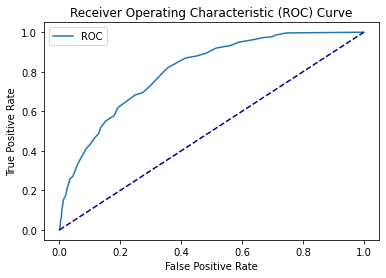

AUC: 0.81


In [14]:
model_knn = KNeighborsClassifier(n_neighbors=60,p=2)

def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

fpr1,tpr1=roc(model_knn,X_train,y_train,X_test,y_test)

## Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [3,5,6,7,4],
              'min_samples_split': np.arange(50,300,10),
              'min_samples_leaf': np.arange(50,250,10)}

hyperp_search(classifier,parameters)

Fitting 4 folds for each of 5000 candidates, totalling 20000 fits
f1_train: 0.605089 using {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 130}
f1         train 0.613   test 0.554
precision  train 0.673   test 0.608

[[491  98]
 [147 152]]


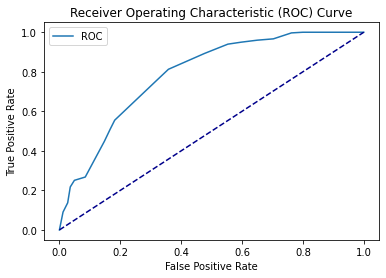

AUC: 0.79


In [16]:
model_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_leaf=50, min_samples_split=130)

fpr2,tpr2=roc(model_tree,X_train,y_train,X_test,y_test)


In [17]:
from sklearn import tree
r = tree.export_text(model_tree,feature_names=X_test.columns.tolist(),max_depth=5)
print(r)

|--- weather <= -0.45
|   |--- temperature <= 0.59
|   |   |--- month_8 <= 0.50
|   |   |   |--- vulc <= 0.80
|   |   |   |   |--- weather <= -1.24
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- weather >  -1.24
|   |   |   |   |   |--- class: 0
|   |   |   |--- vulc >  0.80
|   |   |   |   |--- perc_nat_rubber <= 0.26
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- perc_nat_rubber >  0.26
|   |   |   |   |   |--- class: 0
|   |   |--- month_8 >  0.50
|   |   |   |--- perc_nat_rubber <= -0.75
|   |   |   |   |--- vulc <= -0.09
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- vulc >  -0.09
|   |   |   |   |   |--- class: 0
|   |   |   |--- perc_nat_rubber >  -0.75
|   |   |   |   |--- class: 0
|   |--- temperature >  0.59
|   |   |--- class: 1
|--- weather >  -0.45
|   |--- temperature <= 0.63
|   |   |--- perc_nat_rubber <= -0.55
|   |   |   |--- perc_imp <= 0.04
|   |   |   |   |--- class: 1
|   |   |   |--- perc_imp >  0.04
|   |   |   |   |--- class: 1
|   |   |

## Logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":np.arange(5,100,5), "max_iter":np.arange(50,700,15) } #I progressively narrowed it down 


hyperp_search(classifier,parameters)


Fitting 4 folds for each of 836 candidates, totalling 3344 fits
f1_train: 0.570995 using {'C': 10, 'max_iter': 50}
f1         train 0.594   test 0.593
precision  train 0.698   test 0.692

[[520  69]
 [144 155]]


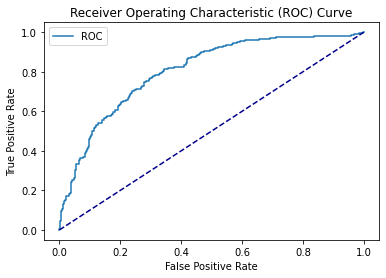

AUC: 0.80


In [21]:
model = LogisticRegression(C=10, max_iter=50)

fpr4,tpr4=roc(model,X_train,y_train,X_test,y_test)

In [22]:
model.fit(X_train,y_train)

coeff=pd.DataFrame()
coeff["feature"]=X_train.columns
coeff["w"]=model.coef_[0]

coeff.sort_values(by=['w'], inplace=True)

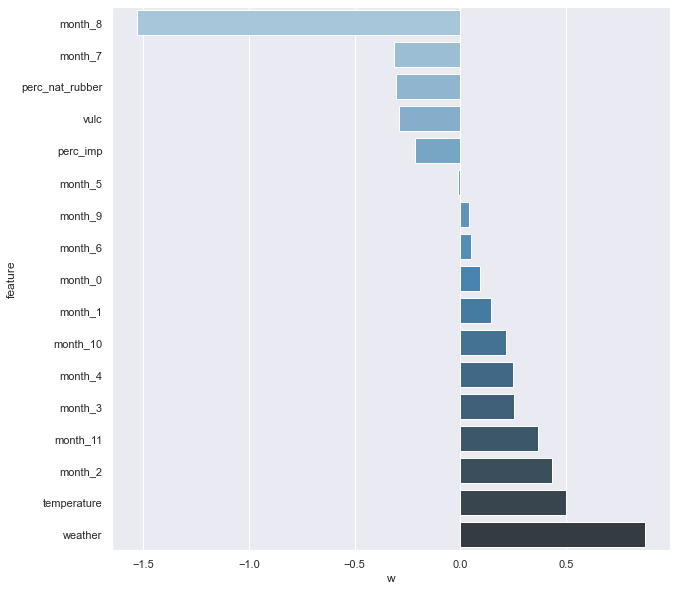

In [23]:
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(data=coeff, y="feature", x="w", palette="Blues_d", orient="h")
sns.set(rc={'figure.figsize':(6,4)})


# SMV

In [24]:
from sklearn.svm import SVC

classifier = SVC()
parameters = {"kernel":['linear','poly'], "C":np.arange(1,110,1),
             'gamma':['auto'],
             'degree': [2,3,5,7]}

hyperp_search(classifier,parameters)
#there is a little overfitting here but the results were less good than Ada and tree 

Fitting 4 folds for each of 872 candidates, totalling 3488 fits
f1_train: 0.549055 using {'C': 15, 'degree': 2, 'gamma': 'auto', 'kernel': 'linear'}
f1         train 0.559   test 0.542
precision  train 0.720   test 0.702

[[533  56]
 [167 132]]


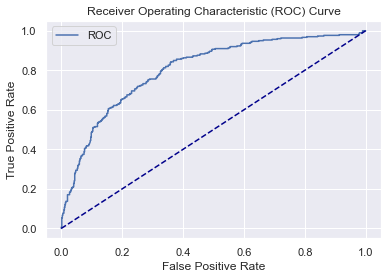

AUC: 0.80


In [26]:
model = SVC(C=15, kernel='linear',degree= 2,probability=True,gamma= 'auto')

fpr5,tpr5=roc(model,X_train,y_train,X_test,y_test)

#this model is linear, so fairly simple, using other subsets of variables I also obtained mostly linear and polynomials
#up to a degree 2 

# Perceptron

In [28]:
from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(55,5),(60,5),(70,5),(65,5),(71,5),(67,5)], #I narrowed down my grid search progressively
              "max_iter": [50,100],
              "alpha": np.arange(0.6,1,0.1)
             ,'learning_rate' : ['constant']}#,"solver":['sgd','adam']}

hyperp_search(classifier,parameters)
#there is a little overfitting here but lowering complexity I did not obtain better results than Ada

Fitting 4 folds for each of 48 candidates, totalling 192 fits
f1_train: 0.595654 using {'alpha': 0.7999999999999999, 'hidden_layer_sizes': (71, 5), 'learning_rate': 'constant', 'max_iter': 100}
f1         train 0.624   test 0.580
precision  train 0.709   test 0.664

[[511  78]
 [145 154]]


C:\Users\prisc\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


C:\Users\prisc\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


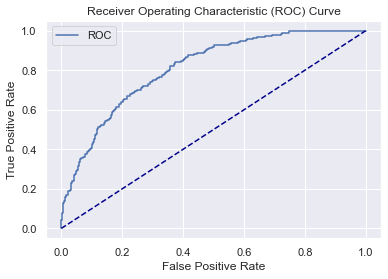

AUC: 0.81


In [30]:
model_MLP=MLPClassifier(hidden_layer_sizes=(71, 5), alpha=0.8, max_iter=100)

fpr6,tpr6=roc(model_MLP,X_train,y_train,X_test,y_test)

## Adaboost

In [45]:
from sklearn.ensemble import AdaBoostClassifier
classifier = AdaBoostClassifier()
parameters = {"n_estimators":np.arange(5,50,1),
            "learning_rate":np.arange(0.1,2,0.1)}

hyperp_search(classifier,parameters)

Fitting 4 folds for each of 855 candidates, totalling 3420 fits
f1_train: 0.627160 using {'learning_rate': 1.0, 'n_estimators': 9}
f1         train 0.622   test 0.586
precision  train 0.651   test 0.619

[[487 102]
 [133 166]]


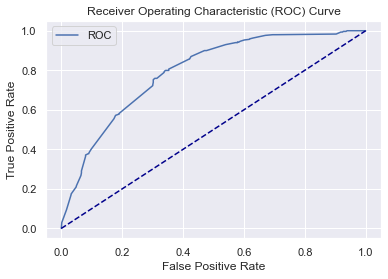

AUC: 0.79


In [31]:
from sklearn.ensemble import AdaBoostClassifier
model_Ada=AdaBoostClassifier(n_estimators=9, learning_rate=1.0)

fpr7,tpr7=roc(model_Ada,X_train,y_train,X_test,y_test)

## Random forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
param_RF ={'criterion': ['entropy','gini'],
              'n_estimators' : [20,50,100,500,200],
              'max_depth': [3,4,5,6,7],'min_samples_leaf':[50,70,100,200,150]}

hyperp_search(RF,param_RF)
#In all my models, the results for Ramdom forest were poor, compared to tree models in particular, which I found suprising
#considering it is usually a pretty good model

Fitting 4 folds for each of 250 candidates, totalling 1000 fits
f1_train: 0.544420 using {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 50, 'n_estimators': 50}
f1         train 0.552   test 0.521
precision  train 0.734   test 0.701

[[536  53]
 [175 124]]


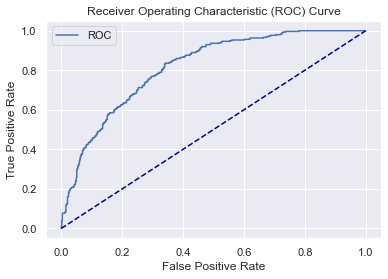

AUC: 0.81


In [46]:
model_RF=RandomForestClassifier(n_estimators=50,criterion='entropy', max_depth=7, min_samples_leaf= 50)

fpr8,tpr8=roc(model_RF,X_train,y_train,X_test,y_test)

## Model Save

In [33]:
import pickle

In [34]:
Rmodel_Ada=AdaBoostClassifier(n_estimators=9, learning_rate=1)
Rmodel_Ada.fit(X, y)

AdaBoostClassifier(learning_rate=1, n_estimators=9)

In [35]:
pickle.dump(Rmodel_Ada, open('Rmodel_Ada.pkl', 'wb'))

# Making predictions

In [36]:
import pickle
import pandas as pd
import numpy as np
import math
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [37]:
# load scaler modand el
loaded_scaler = pickle.load(open('Rscaler.pkl', 'rb'))
loaded_model = pickle.load(open('Rmodel_Ada.pkl', 'rb'))

In [38]:
df2 = pd.read_csv('tyres_prediction.csv')
len(df2)

7984

In [39]:
df_selec_numerical2=df2[["vulc","perc_nat_rubber","weather","perc_imp","temperature"]]
df_categorical2=df2[["month"]]

dummies2 = pd.get_dummies(df_categorical2.astype(str)) 
#I added .astype(str) because the categorical variables where written as numerical
dummies2=dummies2.reset_index(drop = True)

scaled_df2 = pd.DataFrame(loaded_scaler.transform(df_selec_numerical2))
scaled_df2.columns = df_selec_numerical2.columns

X2=pd.concat([dummies2,scaled_df2], axis = 1)

In [40]:
y_Ada_predictions = loaded_model.predict(X2)

In [41]:
np.savetxt("RAda_predictions.csv", (y_Ada_predictions).astype(int), delimiter=",", fmt='%.0f')

# Model explanation


In [1]:
import shap

#finding out which are the important variables
# compute SHAP values
shap.initjs()

X_train_summary = shap.sample(X_train, 100)

explainer = shap.KernelExplainer(Rmodel_Ada.predict_proba,X_train_summary)
shap_values = explainer.shap_values(X_train_summary)

ModuleNotFoundError: No module named 'shap'

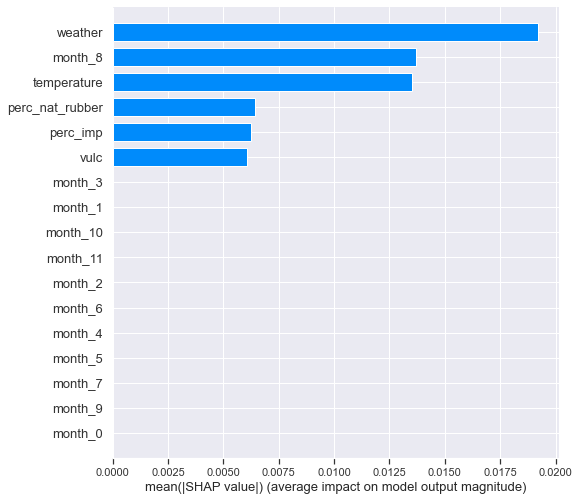

In [43]:
shap.summary_plot(shap_values[0], X_train_summary, plot_type="bar", feature_names=list(X_train.columns))

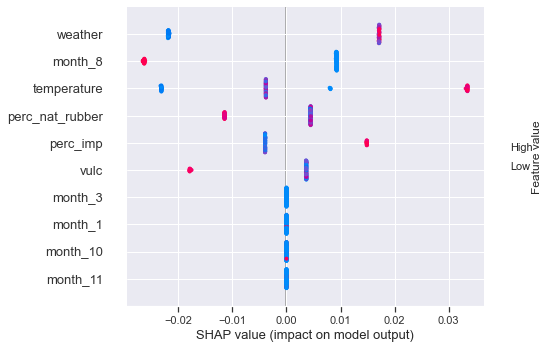

In [44]:
shap.summary_plot(shap_values[1],X_train_summary , feature_names=list(X_train.columns), max_display=10)

In [45]:
i=99
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X_train_summary.iloc[i], feature_names=list(X_train.columns[:-1]))